In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.XGboost_Model_Module import Xgboost_model
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation, predict

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2022.csv')
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'xgboost class regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Results/Italy/Veneto/Culex/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [   0.    4.    9.   18.   33.   56.   93.  155.  266.  535. 7463.]


In [7]:
model = Xgboost_model(model_type = model_type, learning_rate = 0.2,
                      embedding_data = embedded_data,  transformation_list = transformation_list,
                      early_stop = False, l1_weight = 1.5, l2_weight = 0, weights = False)

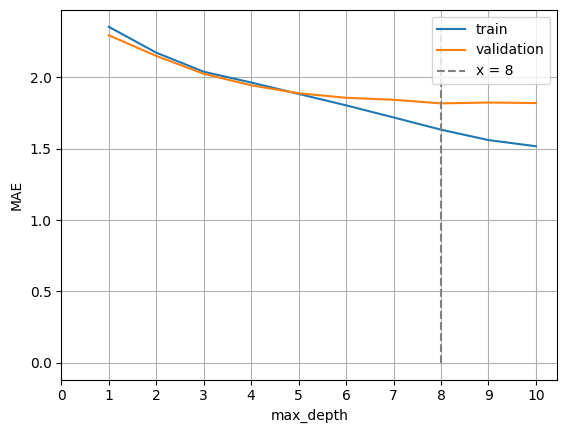

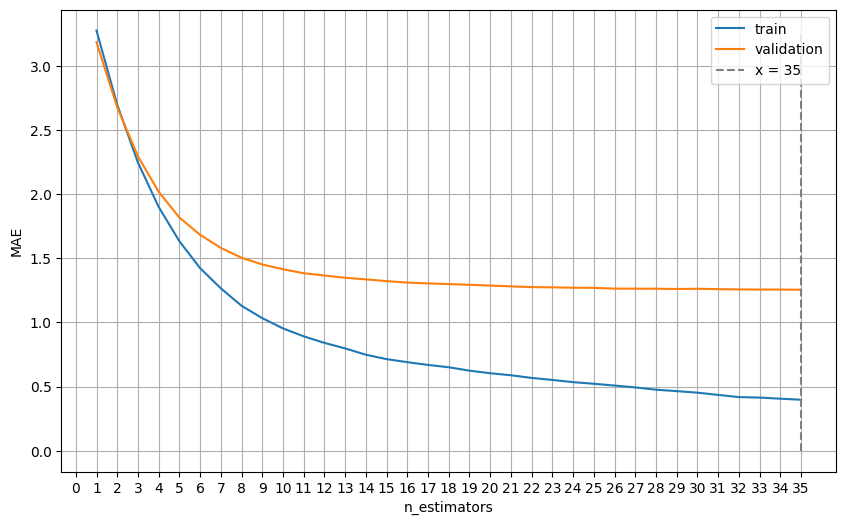

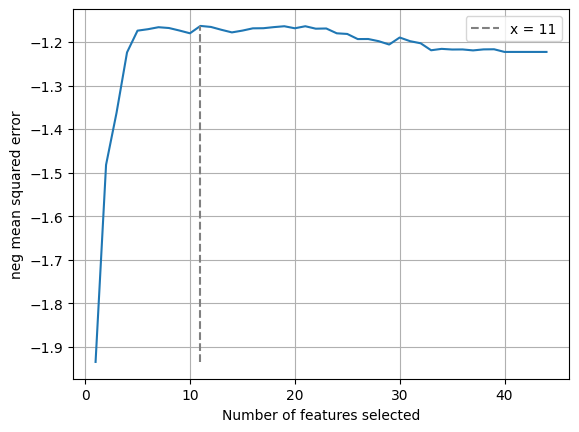

max_depth:  8
Number of estimators:  35
Selected_features:  Index(['x', 'y', 'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'FS_AREA_1km',
       'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'days_distance',
       'mo_cos', 'year'],
      dtype='object')


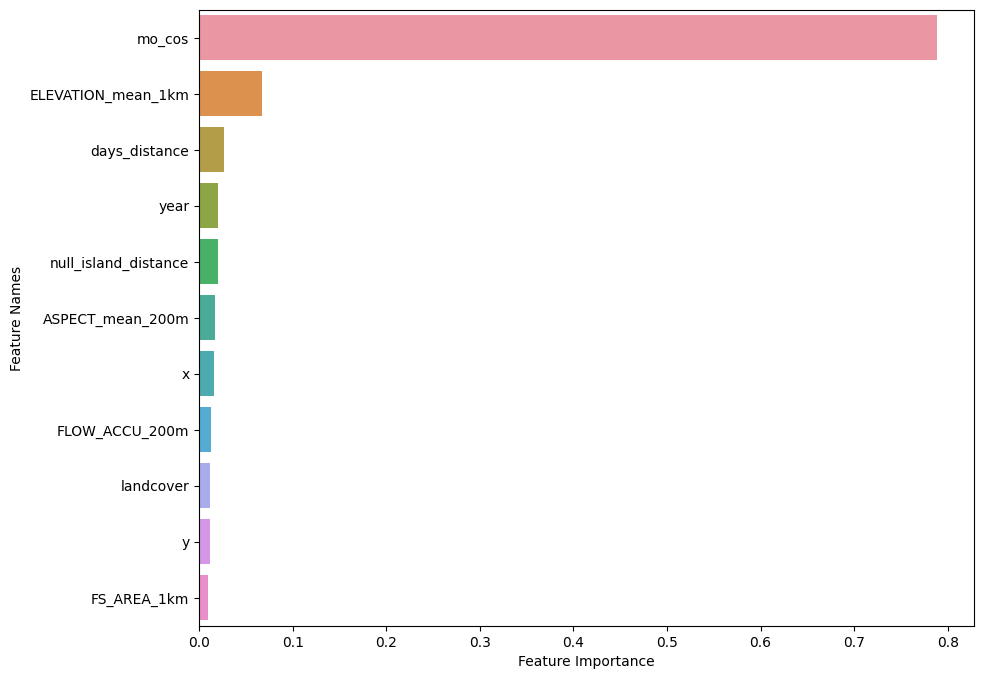

MAE on train set:  0.6393916056988833
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.1225296442687747
Error <= 3: 97.47 %
min prediction: 0.0
max prediction: 9.0


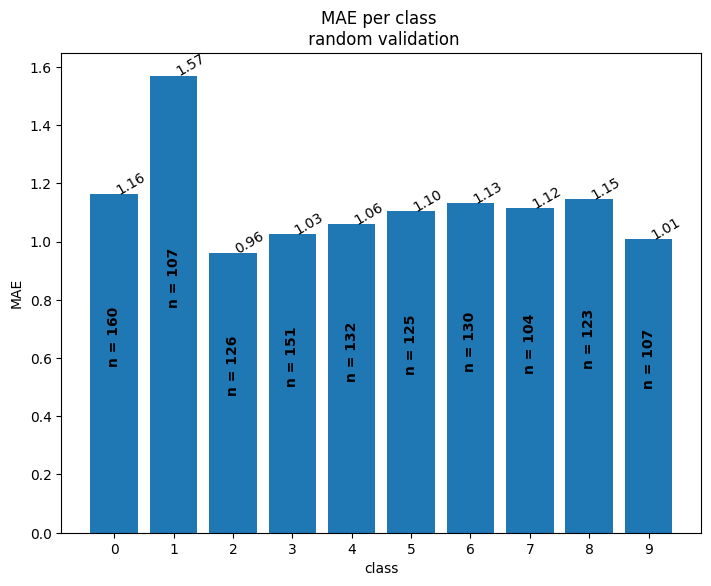

-----------|class error-MAE| difference-----------
mean: 0.12904468732785085
std: 0.1517923820612337
coefficient of variation (std/mean): 1.176277653923017

----------normalized difference-------------
mean: 0.23012969240133394
std: 0.2706964146758667
coefficient of variation (std/mean): 1.1762776539230173


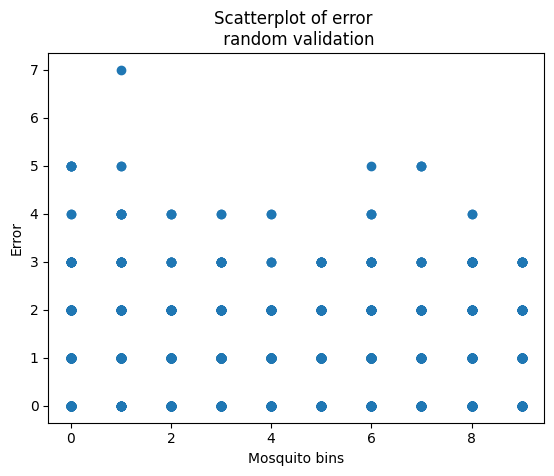

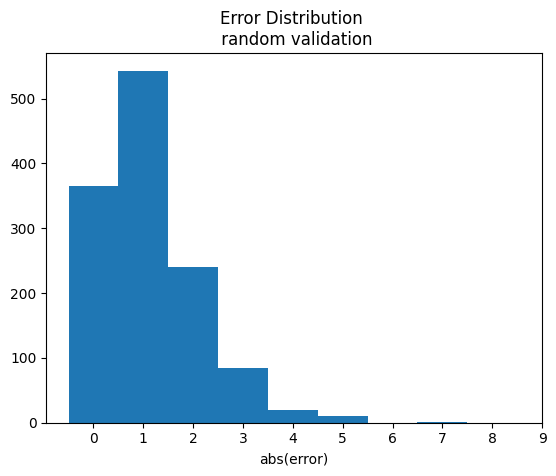

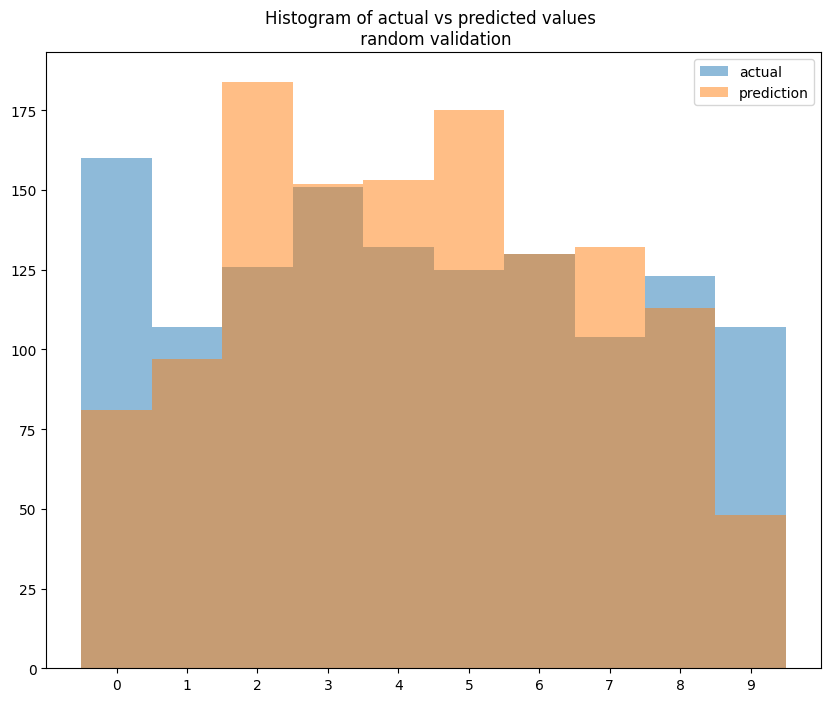

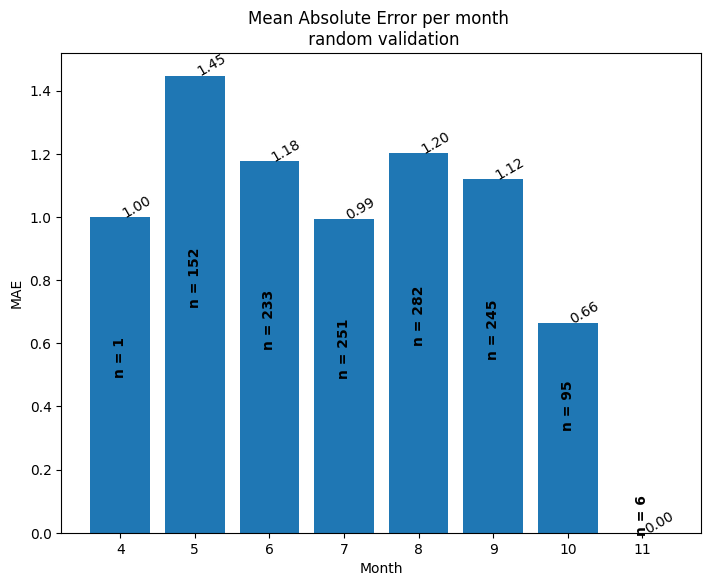

In [8]:
test_model_random_split(data, model, filepath = '', date_col = date_col, case='', fi = True, export=exp)

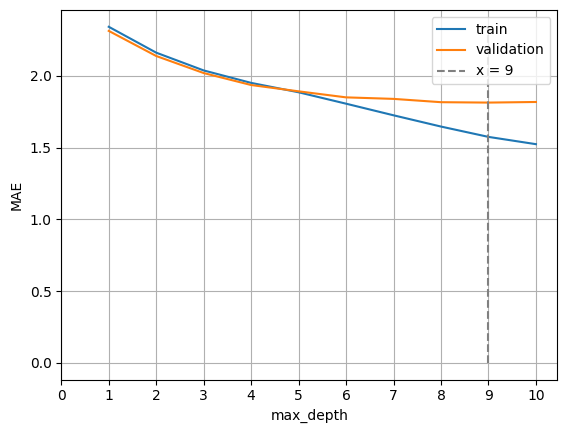

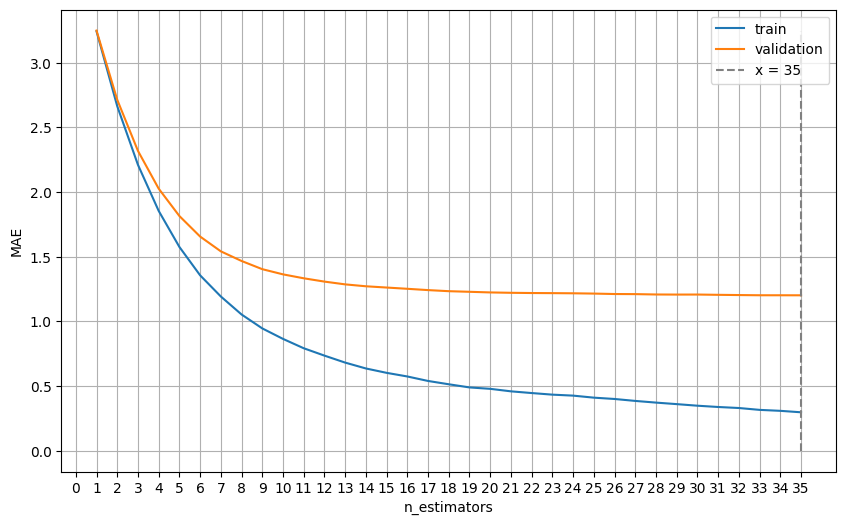

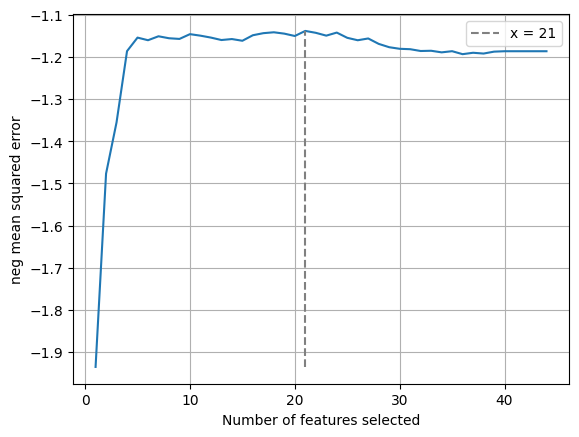

max_depth:  9
Number of estimators:  35
Selected_features:  Index(['x', 'y', 'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_apr_day_mean',
       'lst_jan_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover', 'null_island_distance',
       'days_distance', 'mo_cos', 'year'],
      dtype='object')
MAE on train set:  0.40830303988198724
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.1082661608977398
Error <= 3: 97.49 %
min prediction: 0.0
max prediction: 9.0


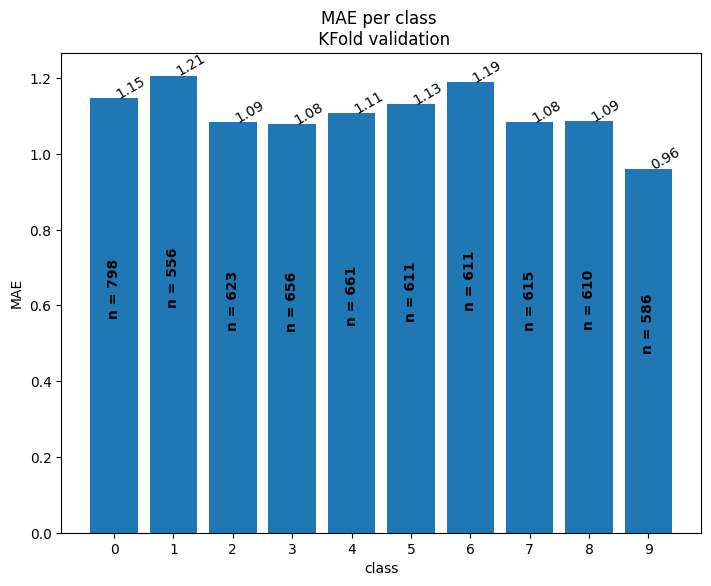

-----------|class error-MAE| difference-----------
mean: 0.14857577221335444
std: 0.06573205893384093
coefficient of variation (std/mean): 0.44241438529728694

----------normalized difference-------------
mean: 0.5996031882412153
std: 0.2652730759480307
coefficient of variation (std/mean): 0.44241438529728694


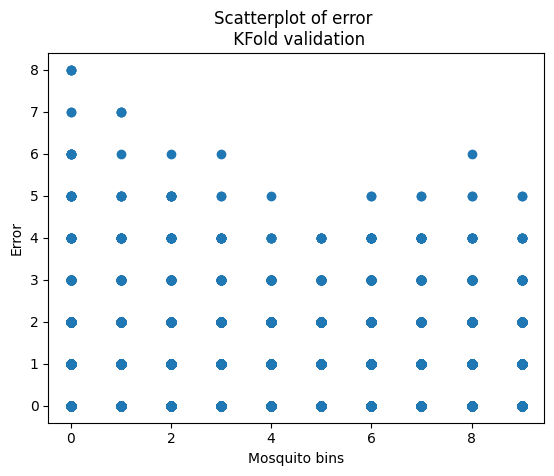

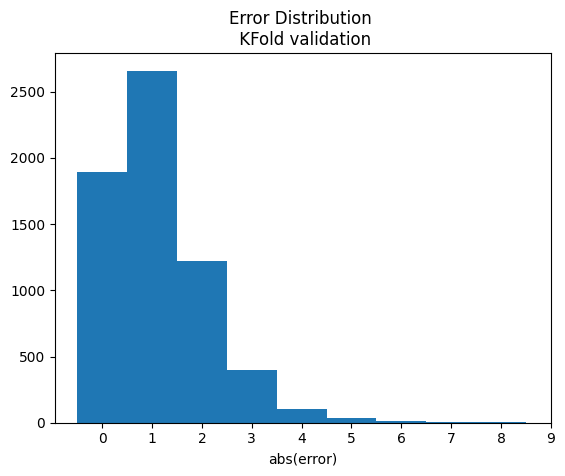

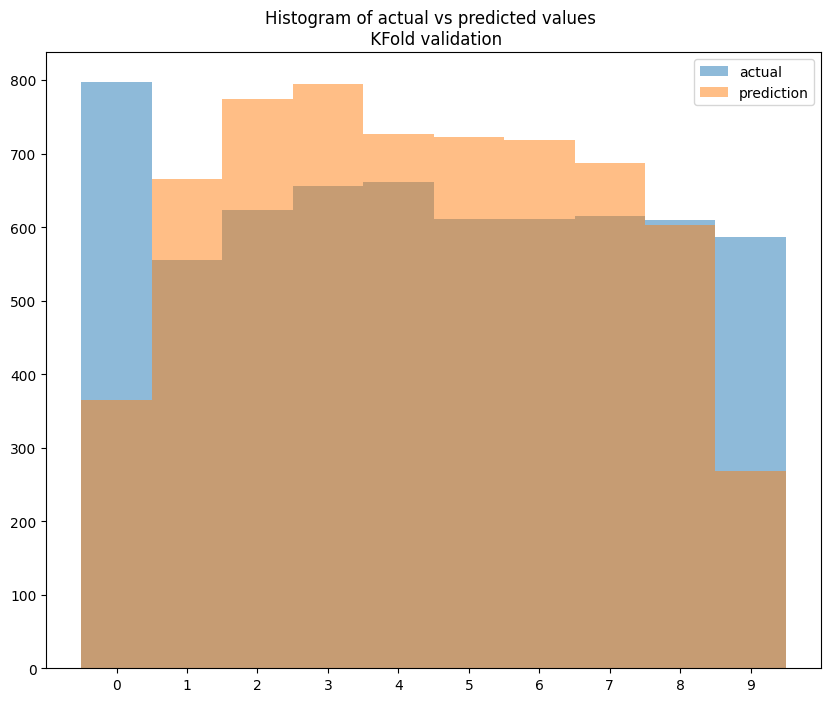

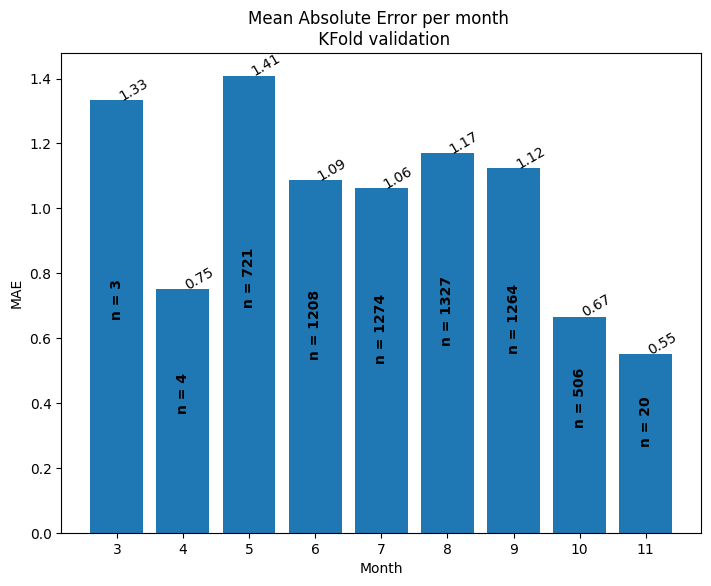

In [9]:
train_model_KFold(data, model, date_col=date_col)

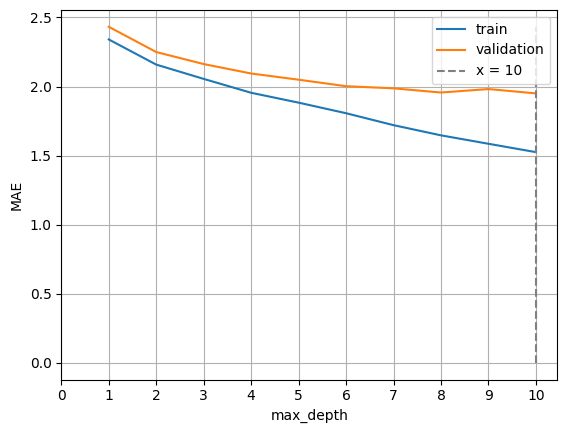

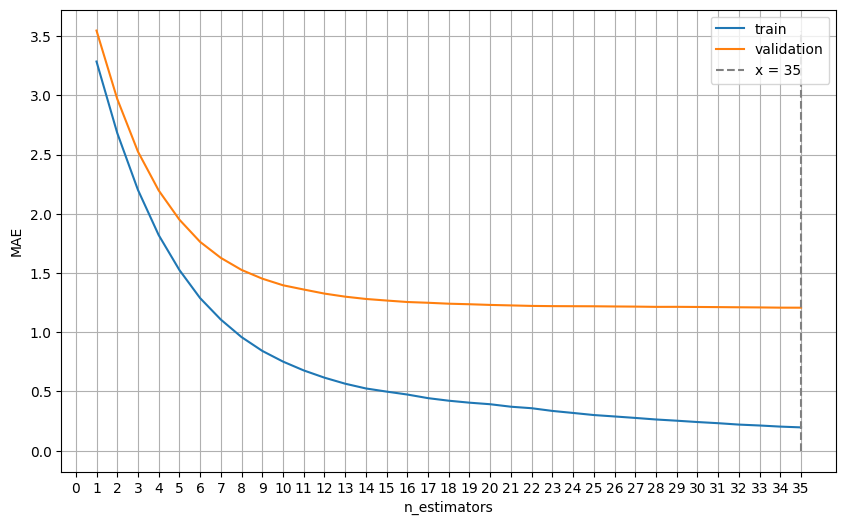

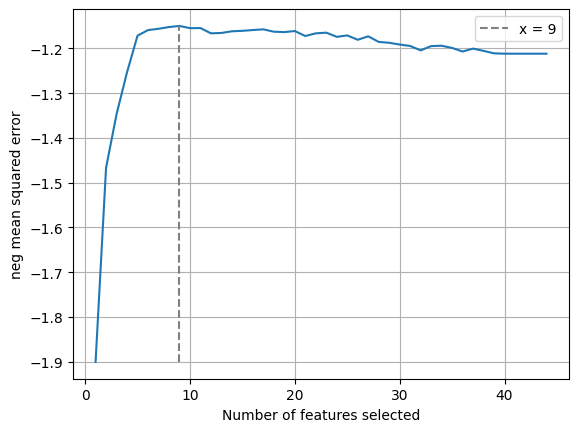

max_depth:  10
Number of estimators:  35
Selected_features:  Index(['x', 'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'FLOW_ACCU_200m',
       'landcover', 'null_island_distance', 'days_distance', 'mo_cos', 'year'],
      dtype='object')
2022
MAE on train set:  0.4437352245862884
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.3431786216596344
Error <= 3: 95.64 %
min prediction: 0.0
max prediction: 9.0


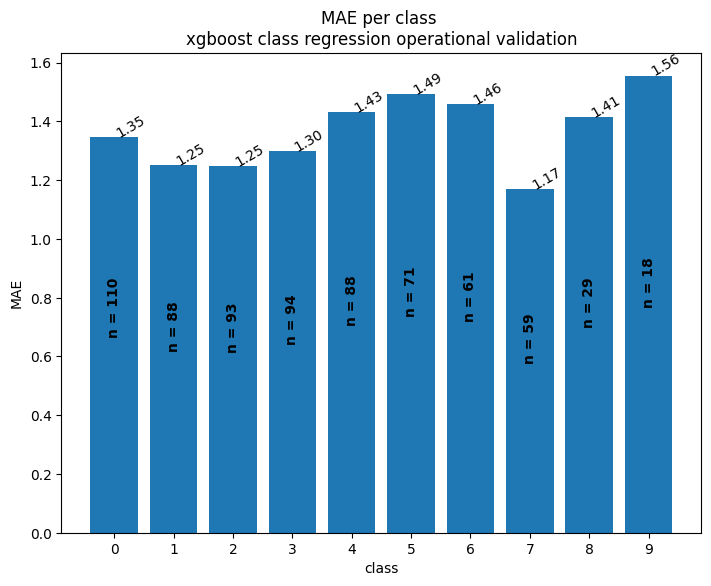

-----------|class error-MAE| difference-----------
mean: 0.1892284335551251
std: 0.11770247561281687
coefficient of variation (std/mean): 0.6220126299281993

----------normalized difference-------------
mean: 0.49014779618425086
std: 0.3048781197580769
coefficient of variation (std/mean): 0.6220126299281993


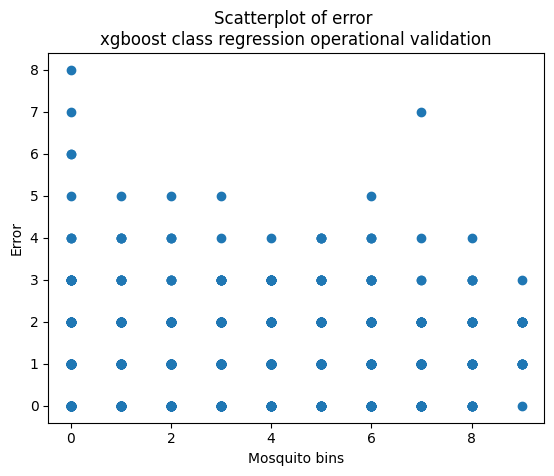

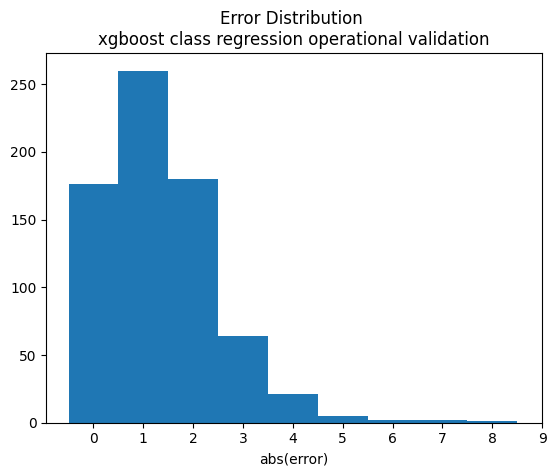

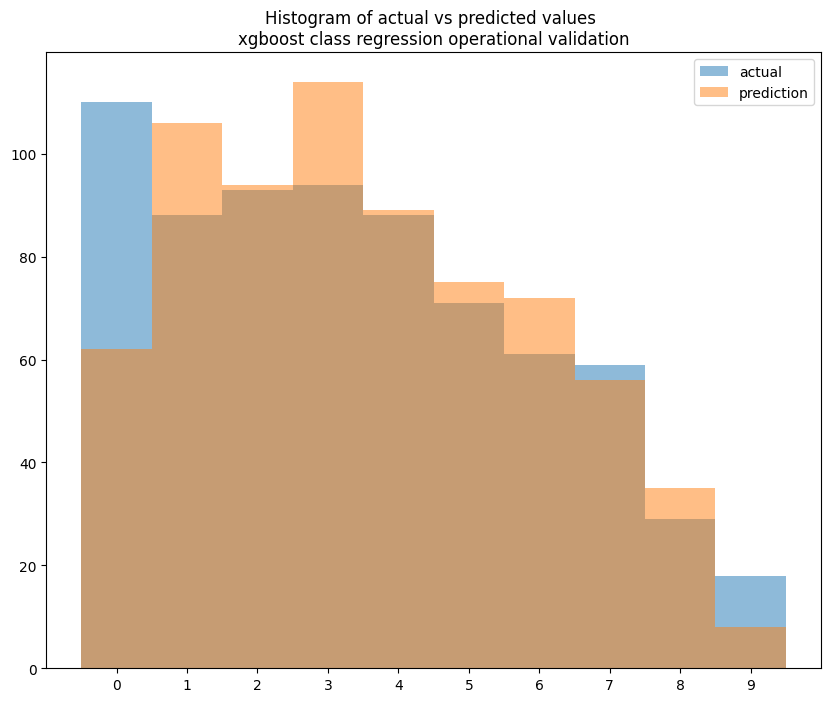

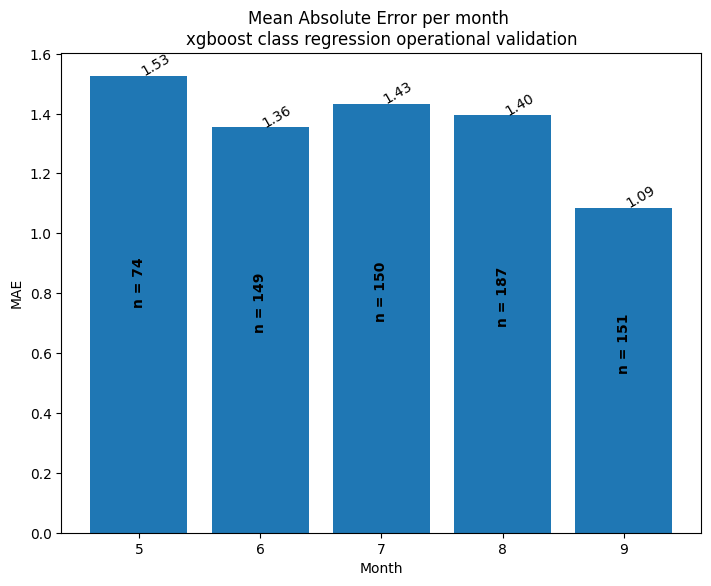

In [10]:
operational_validation(data, model, filepath = path, date_col = date_col,
                       date = '2022-01-01', case = case_title, export= exp)

operational validation:
stable features: 
    MAE on train set:  0.12279635258358662
    MAE on test set:  1.481012658227848
    Error <= 3: 93.95 %
All features:
    MAE on train set:  0.04893617021276596
    MAE on test set:  1.5119549929676512
    Error <= 3: 92.41 %
different fatures:
    MAE on train set:  0.2127321850726106
    MAE on test set:  1.3966244725738397
    Error <= 3: 95.36 %